In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import joblib
from imblearn.over_sampling import SMOTE

In [2]:
# Importing Dataset
df = pd.read_excel('EN071R_REGISTER POLI IMUN SDIDTK JAN - 18 SEPTEMBER .xls')

#Data Understanding and Cleaning

In [3]:
df.head()

,Unnamed: 0,No,Tanggal Kunjungan,Nama,Tanggal Lahir,Umur,Jenis Kelamin,Agama,Status,Pendidikan,...,Diagnosis,Keterangan Diagnosis,Anamnesa,Catatan Fisik,Catatan Dokter,Rujukan,Obat,Askep,Unnamed: 37,Unnamed: 38
0,NaN,1.0,2024-01-02,HA********EF ALFARIZI,2023-11-25,0 Tahun 9 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z23.2,BCG + POLIO 1,tidak ada keluhan \nsuntik BCG,tidak ada keluhan \nsuntik BCG,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2.0,2024-01-02,AR********AHREZA,2023-12-27,0 Tahun 8 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z38.0,"KN 2, USIA 6HARI","tidak ada keluhan\nKN1\nasi +, mata belekan","tidak ada keluhan\nKN1\nasi +, mata belekan",NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,2024-01-02,AQ********AH,2023-12-26,0 Tahun 8 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z38.0,"KN 2, USIA 7HARI",tidak ada keluhan\nKN 1\n,tidak ada keluhan\nKN 1\n,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,2024-01-02,AR********HURROHMAN,2023-11-28,0 Tahun 9 Bulan,PRIA,ISLAM,BELUM MENIKAH,LAINNYA,...,Z23.2,BCG,tidak ada keluhan,tidak ada keluhan,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5.0,2024-01-02,AN********NDYA KHAIYANG,2023-01-29,1 Tahun 7 Bulan,WANITA,ISLAM,BELUM MENIKAH,SMA,...,Z27.4,"MR, IPV2",tidak ada keluhan,tidak ada keluhan,NaN,NaN,-PARASETAMOL SYR 120 MG/5 ML | 1 BOTOL,NaN,NaN,NaN


In [4]:
# Drop unnecessary column
df = df[['Umur', 'Jenis Kelamin', 'TB', 'BB', 'INDEX BB/PB']]
df

,Umur,Jenis Kelamin,TB,BB,INDEX BB/PB
0,0 Tahun 9 Bulan,PRIA,58.0,4.67,GIZI BAIK
1,0 Tahun 8 Bulan,PRIA,50.0,3.41,GIZI BAIK
2,0 Tahun 8 Bulan,PRIA,50.0,3.12,GIZI BAIK
3,0 Tahun 9 Bulan,PRIA,55.0,4.30,GIZI BAIK
4,1 Tahun 7 Bulan,WANITA,68.0,6.20,GIZI KURANG
...,...,...,...,...,...
3433,NaN,NaN,NaN,NaN,NaN
3434,NaN,NaN,NaN,NaN,NaN
3435,NaN,NaN,NaN,NaN,NaN
3436,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Umur           3422 non-null   object 
 1   Jenis Kelamin  3422 non-null   object 
 2   TB             3391 non-null   float64
 3   BB             3391 non-null   float64
 4   INDEX BB/PB    3422 non-null   object 
dtypes: float64(2), object(3)
memory usage: 134.4+ KB


In [6]:
df.describe()

,TB,BB
count,3391.000000,3391.000000
mean,73.474359,10.248744
std,24.091438,10.894337
min,5.300000,1.500000
25%,56.500000,4.900000
50%,66.500000,7.300000
75%,83.000000,10.830000
max,173.000000,124.000000


In [7]:
# Handling null values
df.isna().sum()

,0
Umur,16
Jenis Kelamin,16
TB,47
BB,47
INDEX BB/PB,16


In [8]:
df = df.dropna()
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Umur           3391 non-null   object 
 1   Jenis Kelamin  3391 non-null   object 
 2   TB             3391 non-null   float64
 3   BB             3391 non-null   float64
 4   INDEX BB/PB    3391 non-null   object 
dtypes: float64(2), object(3)
memory usage: 132.6+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

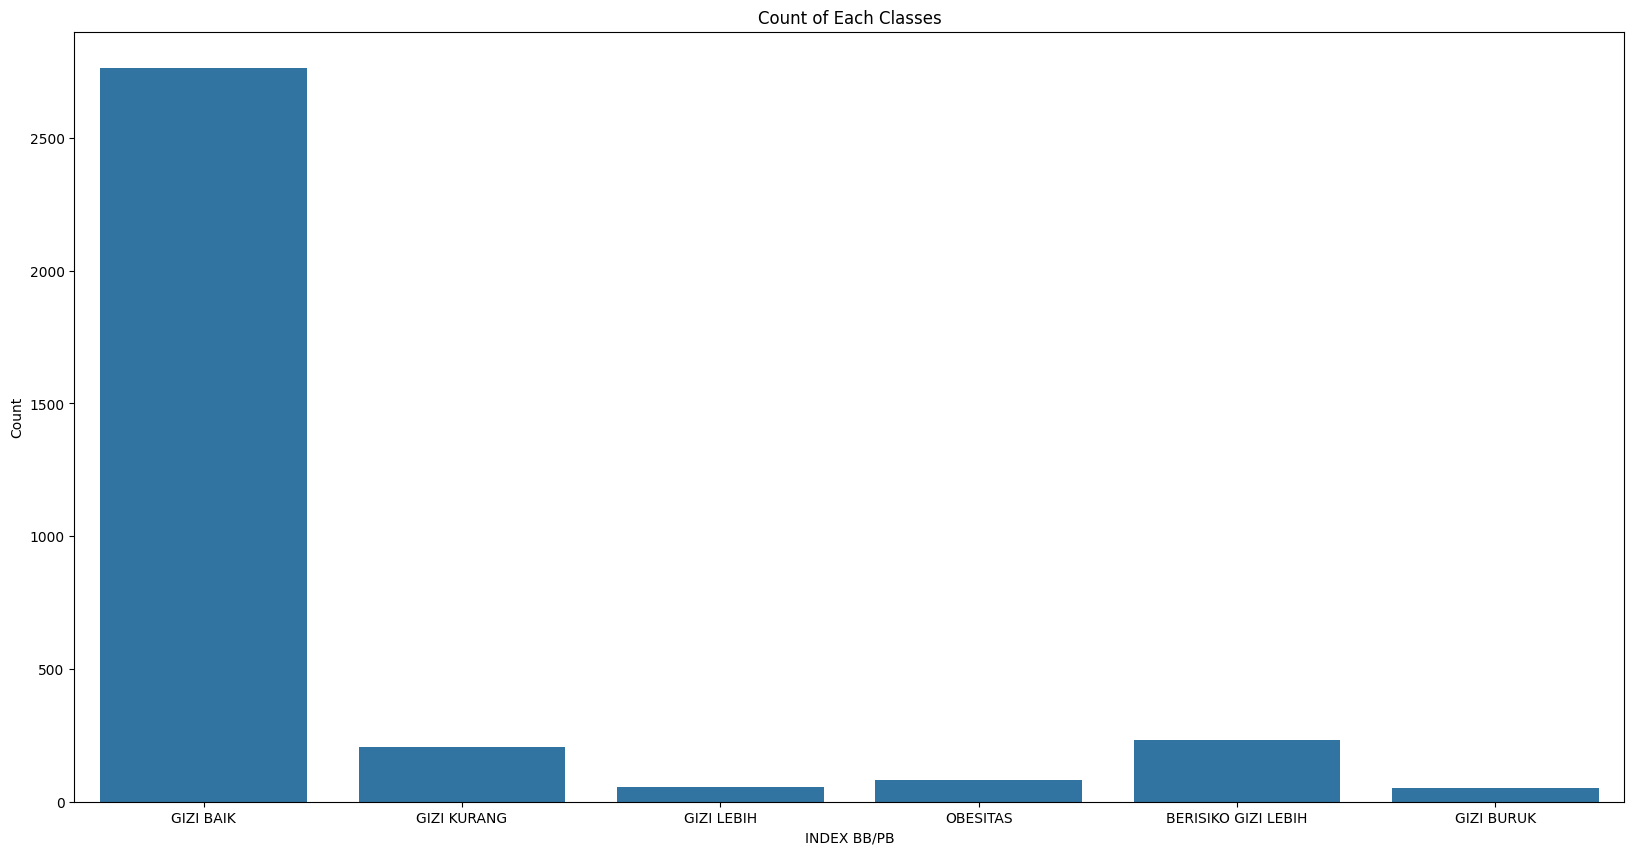

In [9]:
plt.figure(figsize=(20, 10))
sns.countplot(x='INDEX BB/PB', data=df)
plt.title('Count of Each Classes')
plt.xlabel('INDEX BB/PB')
plt.ylabel('Count')
plt.show

In [10]:
df.rename(columns={'Umur': 'Age in Month', 'TB': 'Height', 'BB': 'Weight', 'Jenis Kelamin': 'Gender'}, inplace=True)
df

,Age in Month,Gender,Height,Weight,INDEX BB/PB
0,0 Tahun 9 Bulan,PRIA,58.0,4.67,GIZI BAIK
1,0 Tahun 8 Bulan,PRIA,50.0,3.41,GIZI BAIK
2,0 Tahun 8 Bulan,PRIA,50.0,3.12,GIZI BAIK
3,0 Tahun 9 Bulan,PRIA,55.0,4.30,GIZI BAIK
4,1 Tahun 7 Bulan,WANITA,68.0,6.20,GIZI KURANG
...,...,...,...,...,...
3386,0 Tahun 3 Bulan,WANITA,61.0,5.60,GIZI BAIK
3387,1 Tahun 7 Bulan,WANITA,98.0,9.90,GIZI BURUK
3388,0 Tahun 0 Bulan,PRIA,47.0,3.50,OBESITAS
3389,0 Tahun 1 Bulan,PRIA,54.0,4.50,GIZI BAIK


In [11]:
# Converting Age values into month format
def convert_to_months(Age):
    # Separate the string
    parts = Age.split()
    year = int(parts[0])
    month = int(parts[2])
    # Convert and add months
    age_in_month = (year * 12) + month
    return age_in_month

df['Age in Month'] = df['Age in Month'].apply(convert_to_months)
df

,Age in Month,Gender,Height,Weight,INDEX BB/PB
0,9,PRIA,58.0,4.67,GIZI BAIK
1,8,PRIA,50.0,3.41,GIZI BAIK
2,8,PRIA,50.0,3.12,GIZI BAIK
3,9,PRIA,55.0,4.30,GIZI BAIK
4,19,WANITA,68.0,6.20,GIZI KURANG
...,...,...,...,...,...
3386,3,WANITA,61.0,5.60,GIZI BAIK
3387,19,WANITA,98.0,9.90,GIZI BURUK
3388,0,PRIA,47.0,3.50,OBESITAS
3389,1,PRIA,54.0,4.50,GIZI BAIK


In [12]:
# Convert Age in Month to integer
df['Age in Month'] = df['Age in Month'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3391 entries, 0 to 3390
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age in Month  3391 non-null   int64  
 1   Gender        3391 non-null   object 
 2   Height        3391 non-null   float64
 3   Weight        3391 non-null   float64
 4   INDEX BB/PB   3391 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 132.6+ KB


In [13]:
# Remove rows with Age in Month above 60
df = df[df['Age in Month'] <= 60]

# Reset index after filtering
df = df.reset_index(drop=True)

print(df['INDEX BB/PB'].value_counts())

INDEX BB/PB
GIZI BAIK              2376
BERISIKO GIZI LEBIH     230
GIZI KURANG             201
OBESITAS                 81
GIZI LEBIH               56
GIZI BURUK               52
Name: count, dtype: int64


# Data Preprocessing

In [14]:
# Encode categorical column
df['Gender'] = df['Gender'].map({'PRIA':0, 'WANITA':1})
df['INDEX BB/PB'] = df['INDEX BB/PB'].map({'GIZI BURUK':0, 'GIZI KURANG':1, 'GIZI BAIK':2,
                                           'BERISIKO GIZI LEBIH':3, 'GIZI LEBIH':4, 'OBESITAS':5})
print(df['Gender'].unique())
print(df['INDEX BB/PB'].unique())



[0 1]
[2 1 4 5 3 0]


In [15]:
# Split training and testing data
X = df.drop(["INDEX BB/PB"], axis=1)
y = df["INDEX BB/PB"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

# kfold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Total # of sample in whole dataset: 2996
Total # of sample in train dataset: 2396
Total # of sample in test dataset: 600


In [16]:
# Normalize numerical features
numerical_features = ['Age in Month', 'Height', 'Weight']
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Transform the test data using the same scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_train[numerical_features].head()

,Age in Month,Height,Weight
1542,-0.918290,-0.966489,-0.519392
1297,-0.541527,0.070338,-0.136939
925,-0.466174,-0.383274,-0.292388
1566,-0.918290,-1.290498,-0.692113
2249,-0.616879,-0.188869,-0.149276


# Model Development

In [17]:
# initialize Classifier
svm = SVC(probability=True)

# define the parameter grid
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Specify multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

random_search = RandomizedSearchCV(estimator=svm,
                                   param_distributions=param_dist,
                                   n_iter=20,  # Number of combinations to sample
                                   scoring=scoring,
                                   refit='f1',
                                   cv=kfold,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)  # For reproducibility

# Fit the model
random_search.fit(X_train, y_train)

# Retrieve the best model
best_svm_model_gizi = random_search.best_estimator_

# Export the best model using joblib
joblib.dump(best_svm_model_gizi, 'best_svm_model_gizi.joblib')

Fitting 10 folds for each of 20 candidates, totalling 200 fits


['best_svm_model_gizi.joblib']

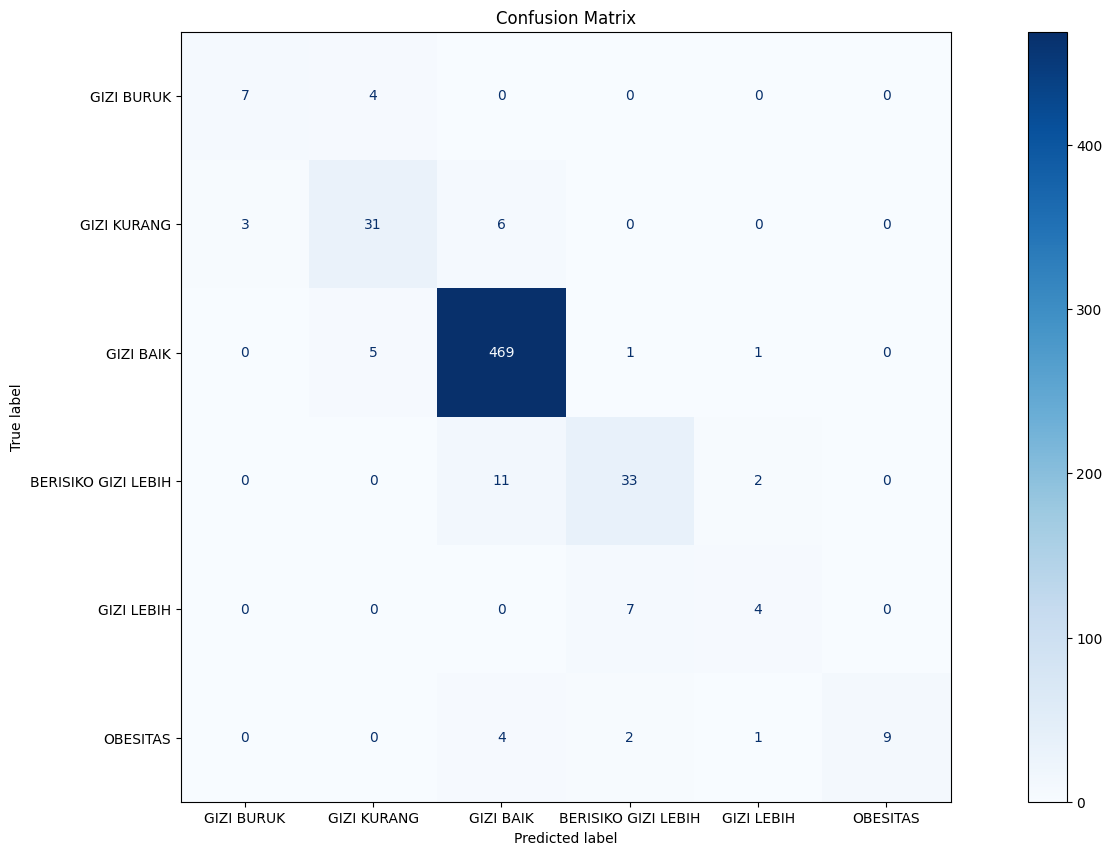

In [18]:
# Evaluate the model on the test data
y_pred = best_svm_model_gizi.predict(X_test)
y_prob = best_svm_model_gizi.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['GIZI BURUK', 'GIZI KURANG', 'GIZI BAIK',
                                                                   'BERISIKO GIZI LEBIH', 'GIZI LEBIH', 'OBESITAS'])
fig, ax = plt.subplots(figsize=(20, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [19]:
# Classification evaluation scores (Accuracy, Precision, Recall, F1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9217
Precision: 0.9185
Recall: 0.9217
F1 Score: 0.9180


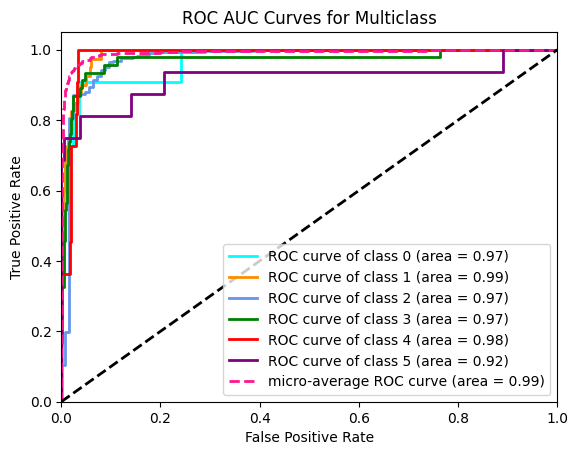

Micro-average ROC AUC (area = 0.99)
Macro-average ROC AUC (area = 0.97)


In [20]:
from sklearn.preprocessing import label_binarize

n_classes = len(np.unique(y_test))

# Binarize the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize dictionaries for FPR, TPR, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_binarized, y_prob, average="micro")

# Compute macro-average ROC AUC
roc_auc_macro = roc_auc_score(y_test_binarized, y_prob, average="macro")

# Plot ROC curves for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Print micro-average and macro-average ROC AUC
print("Micro-average ROC AUC (area = {:.2f})".format(roc_auc_micro))
print("Macro-average ROC AUC (area = {:.2f})".format(roc_auc_macro))

#SMOTE

## Data Preprocessing

In [21]:
# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Before SMOTE:
INDEX BB/PB
2    1900
3     184
1     161
5      65
4      45
0      41
Name: count, dtype: int64

After SMOTE:
INDEX BB/PB
2    1900
3    1900
1    1900
5    1900
0    1900
4    1900
Name: count, dtype: int64


In [22]:
# Normalize numerical features
numerical_features = ['Age in Month', 'Height', 'Weight']
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_balanced[numerical_features] = scaler.fit_transform(X_train_balanced[numerical_features])

# Transform the test data using the same scaler
X_test[numerical_features] = scaler.transform(X_test[numerical_features])
X_train_balanced[numerical_features].head()

,Age in Month,Height,Weight
0,-1.015212,-1.061434,-0.551287
1,-0.698363,-0.185821,-0.362109
2,-0.634994,-0.568902,-0.439001
3,-1.015212,-1.335064,-0.636722
4,-0.761733,-0.404725,-0.368212


## Model Development

In [23]:
# initialize Classifier
svm = SVC(probability=True)

# define the parameter grid
param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

# Specify multiple scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

random_search = RandomizedSearchCV(estimator=svm,
                                   param_distributions=param_dist,
                                   n_iter=20,  # Number of combinations to sample
                                   scoring=scoring,
                                   refit='f1',
                                   cv=kfold,
                                   n_jobs=-1,
                                   verbose=1,
                                   random_state=42)  # For reproducibility

# Fit the model
random_search.fit(X_train_balanced, y_train_balanced)

# Retrieve the best model
best_svm_model_smote_gizi = random_search.best_estimator_

# Export the best model using joblib
joblib.dump(best_svm_model_smote_gizi, 'best_svm_model_smote_gizi.joblib')

Fitting 10 folds for each of 20 candidates, totalling 200 fits


['best_svm_model_smote_gizi.joblib']

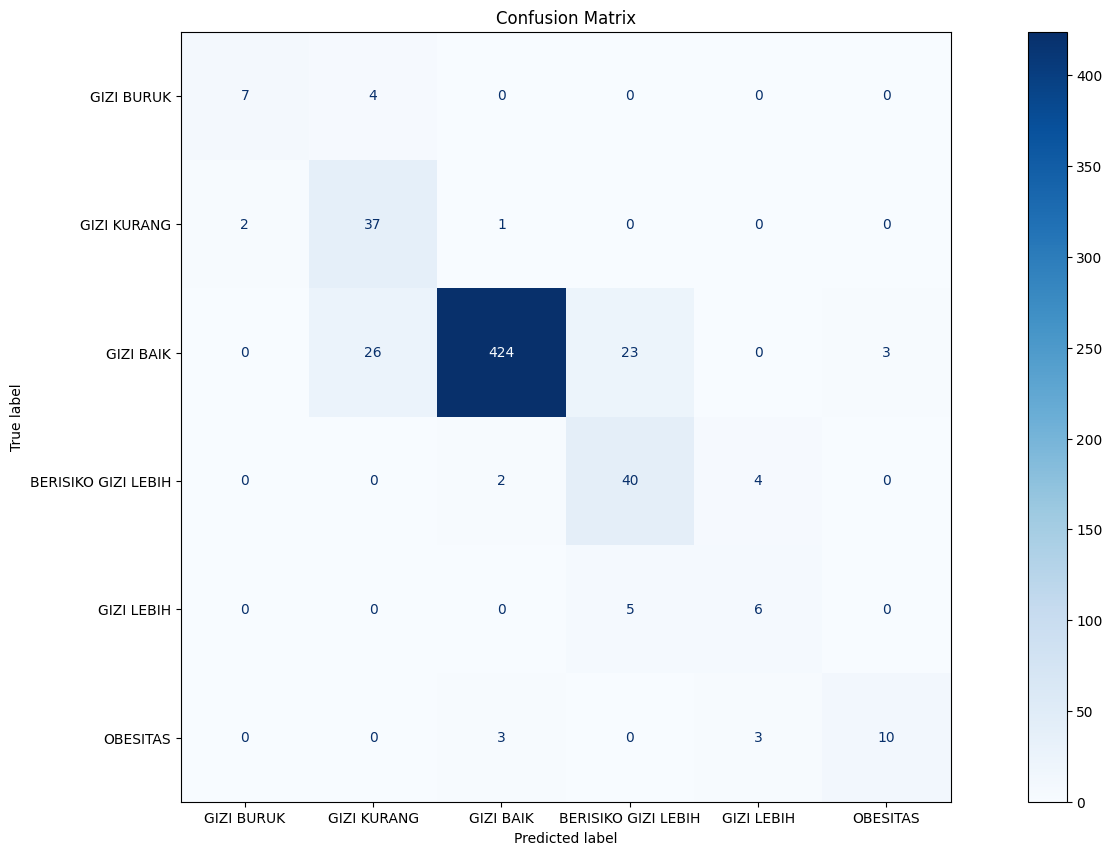

In [24]:
# Evaluate the model on the test data
y_pred = best_svm_model_smote_gizi.predict(X_test)
y_prob = best_svm_model_smote_gizi.predict_proba(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['GIZI BURUK', 'GIZI KURANG', 'GIZI BAIK',
                                                                   'BERISIKO GIZI LEBIH', 'GIZI LEBIH', 'OBESITAS'])
fig, ax = plt.subplots(figsize=(20, 10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Classification evaluation scores (Accuracy, Precision, Recall, F1)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8733
Precision: 0.9074
Recall: 0.8733
F1 Score: 0.8828


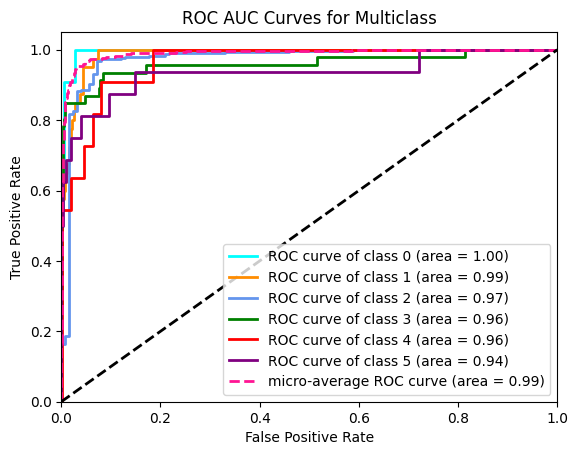

Micro-average ROC AUC (area = 0.99)
Macro-average ROC AUC (area = 0.97)


In [26]:
n_classes = len(np.unique(y_test))

# Binarize the labels for multiclass
y_test_binarized = label_binarize(y_test, classes=np.arange(n_classes))

# Initialize dictionaries for FPR, TPR, and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binarized.ravel(), y_prob.ravel())
roc_auc_micro = roc_auc_score(y_test_binarized, y_prob, average="micro")

# Compute macro-average ROC AUC
roc_auc_macro = roc_auc_score(y_test_binarized, y_prob, average="macro")

# Plot ROC curves for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, color='deeppink', linestyle='--', lw=2,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc_micro))

# Plot random guessing line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves for Multiclass')
plt.legend(loc="lower right")
plt.show()

# Print micro-average and macro-average ROC AUC
print("Micro-average ROC AUC (area = {:.2f})".format(roc_auc_micro))
print("Macro-average ROC AUC (area = {:.2f})".format(roc_auc_macro))